In [1]:
import numpy as np
import matplotlib.pyplot as mlt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\KSSEEB\OneDrive\Documents\Machine Learning\svm\user_data.xlsx')

In [3]:
df.head()

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.shape

(15, 5)

In [7]:
df.isnull().sum()

User ID             0
Gender              0
Age                 0
Estimated Salary    0
Purchased           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [4]:
df['Purchased'].unique()

array([0, 1])

In [5]:
df['Purchased'].value_counts()

Purchased
0    14
1     1
Name: count, dtype: int64

In [14]:
from sklearn.utils import resample

# Identify classes
classes = ['0', '1']

# Get the number of data points in the majority and minority classes
minority = df[df['Purchased'] == 1]
majority = df[df['Purchased'] == 0]

# Upsample minority class
minority_upsampled = resample(minority, 
                                replace=True,      # Sample with replacement
                                n_samples=len(majority),  # Match majority class size
                                random_state=42) # For reproducibility

# Combine majority and upsampled minority
data_set = pd.concat([majority, minority_upsampled])

In [16]:
data_set.head()

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
data_set['Purchased'].value_counts()

Purchased
0    14
1    14
Name: count, dtype: int64

In [18]:
data_set.isnull().sum()

User ID             0
Gender              0
Age                 0
Estimated Salary    0
Purchased           0
dtype: int64

In [19]:
data_set.duplicated().sum()

np.int64(13)

In [20]:
data_set['Gender'] = data_set['Gender'].replace({'Male':1,'Female':0})

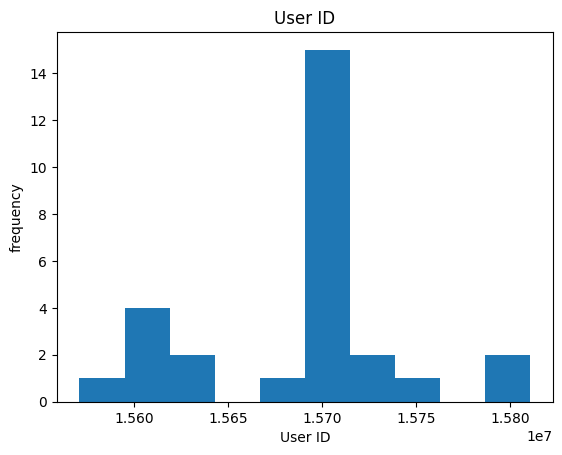

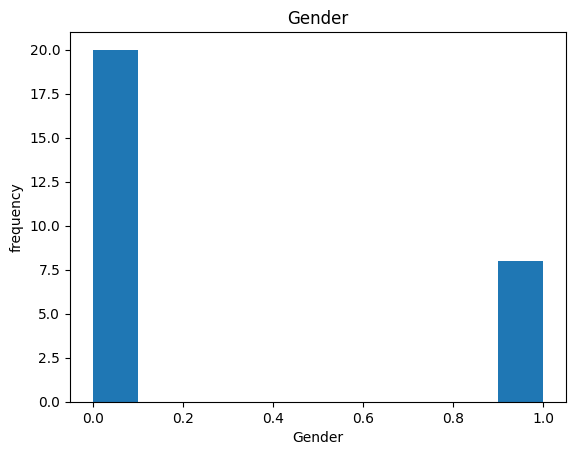

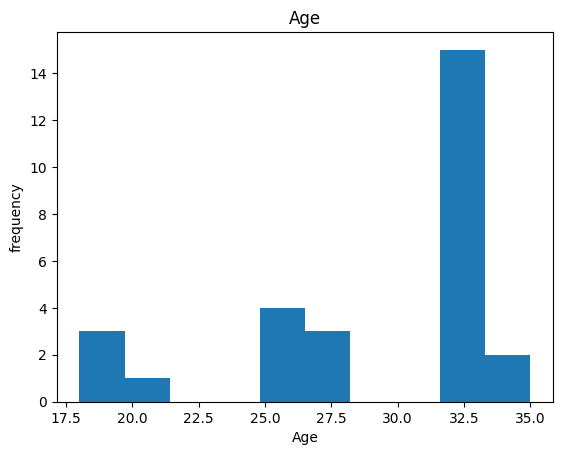

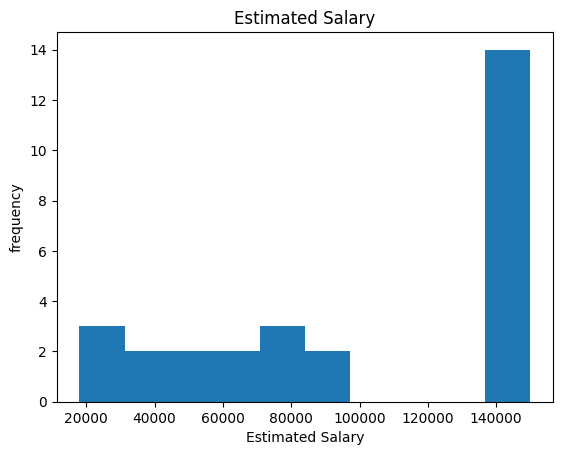

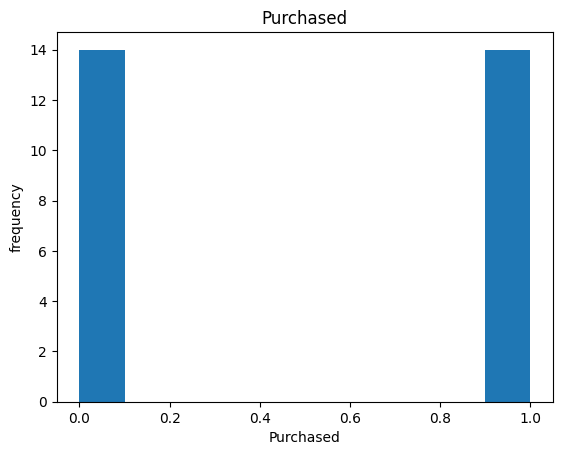

In [21]:
for col in data_set.columns:
    data_set[col].plot(kind='hist',title=col)
    mlt.ylabel('frequency')
    mlt.xlabel(col)
    mlt.show()

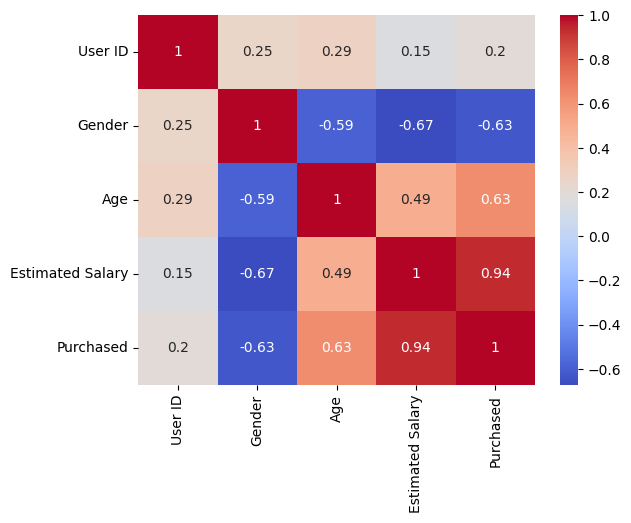

In [23]:
import seaborn as sns

corr = data_set.corr(method='pearson')
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True)
mlt.show()

In [25]:
X = data_set.iloc[:,[1,2,3]].values
y = data_set.iloc[:,4].values

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [35]:
from sklearn.svm import SVC  # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [36]:
y_pred = classifier.predict(x_test)  # After getting the y_pred vector
y_pred

array([0, 1, 0, 1, 0, 0, 1])

In [38]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred) * 100
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report: \n", classification_report)

Accuracy: 100.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [39]:
data_set.head(1)

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,1,19,19000,0


In [40]:
new_data = [[1,20,20000]]
model = classifier.predict(st_x.fit_transform(new_data))
print(model[0])

0
